To address our analysis, we need to respond to the subsequent inquiries:

Do a greater number of restaurants provide online delivery as opposed to offline services?
Which types of restaurants are the most favored by the general public?
What price range is preferred by couples for their dinner at restaurants?


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#importing data
df=pd.read_csv("Zomato-data-.csv")
print(df.head())

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
#Data is having 148 rows and don't have null values. (checked in excel)
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
#rate should be in float
def Handle_rate(value):
    value=value.split("/")
    value=value[0]
    return float(value)
df["rate"]=df["rate"].apply(Handle_rate)
print(df.head())

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


#Explore types of restaurants..

Text(0.5, 0, 'Type of restaurants')

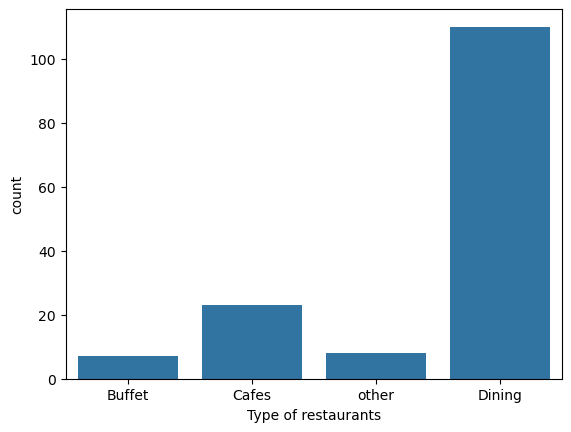

In [12]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of restaurants")

####Conclusion 1:- Majority of restaurants fall into dining category.

Text(0, 0.5, 'Sum of Votes')

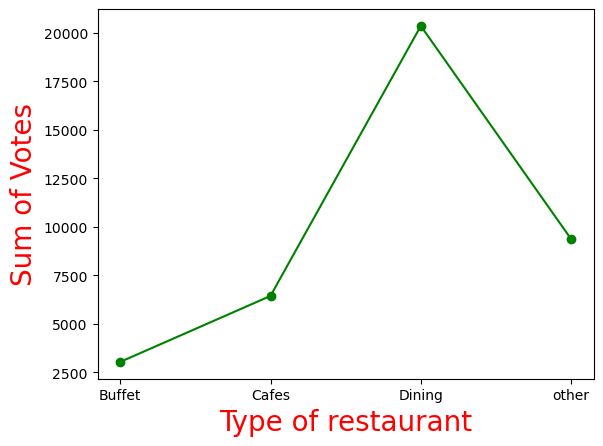

In [17]:
group_by_type=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":group_by_type})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Sum of Votes",c="red",size=20)

####Conclusion 2:- Dining restaurents are preffered by a large number of indivisuals.

In [35]:
# finding restaurent that received maximum votes
max_votes=df["votes"].max()
restaurant_with_max_votes=df.loc[df["votes"]==max_votes,"name"]
print("Reataurante with max Votes is : ",restaurant_with_max_votes)
#Comclusion 3:- is printed output

Reataurante with max Votes is :  38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

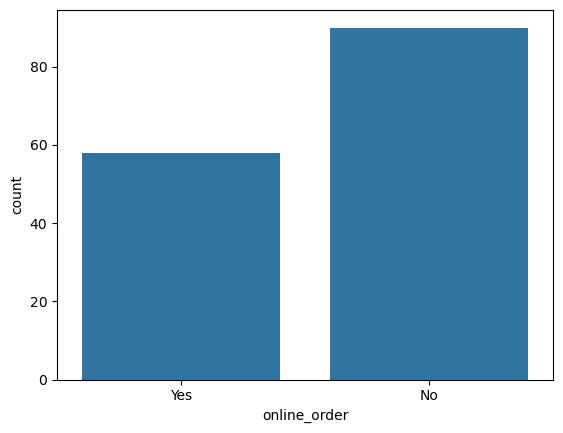

In [36]:
#compare online order and offline orders
sns.countplot(x=df["online_order"])

In [38]:
print(df["online_order"].value_counts())

online_order
No     90
Yes    58
Name: count, dtype: int64


#Conclusion 4:- Majority of restaurants donot accept online orders.

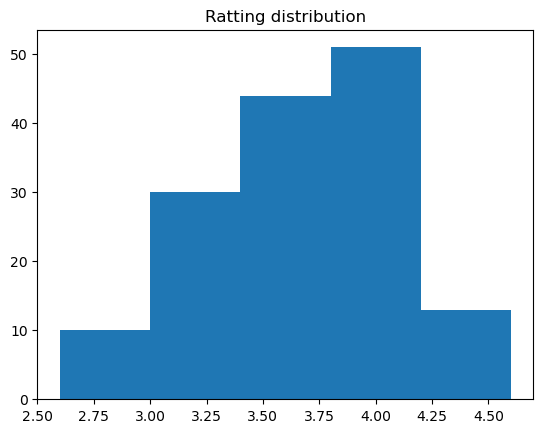

In [52]:
#analysig ratting
plt.hist(df["rate"],bins=5)
plt.title("Ratting distribution")
plt.show()

#Conclusion 5:- majority restaurants received ratting between 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

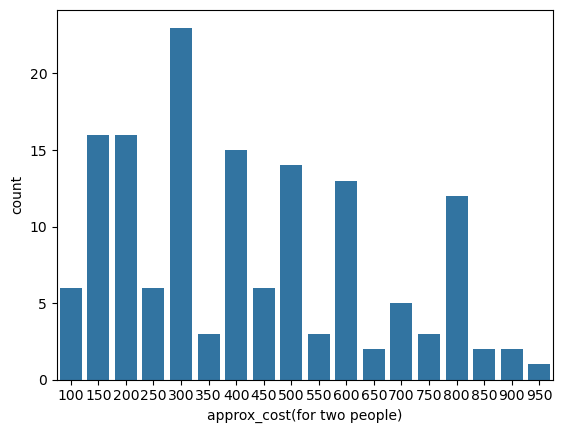

In [59]:
#plt.hist(df["approx_cost(for two people)"],bins=18)
#plt.title("Cost distribution")
#plt.show()
sns.countplot(x=df["approx_cost(for two people)"])

#Conclusion 6:-Majority of couple prefer restairants with approx cost of 300 Rs

<Axes: xlabel='online_order', ylabel='rate'>

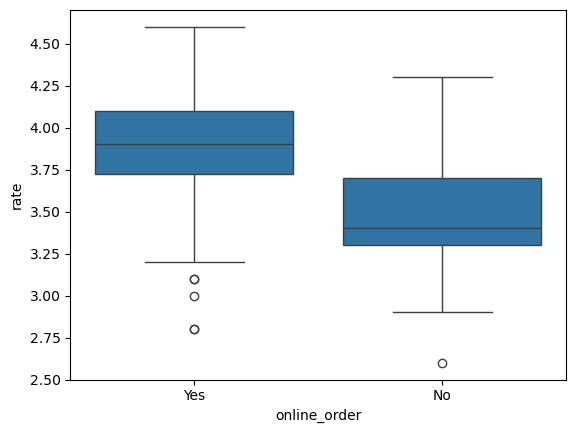

In [60]:
#comparision of ratting betn offline and online orders
sns.boxplot(x="online_order",y="rate",data=df)

#Conclusion 7:- Online orders receive better ratting than offline orders

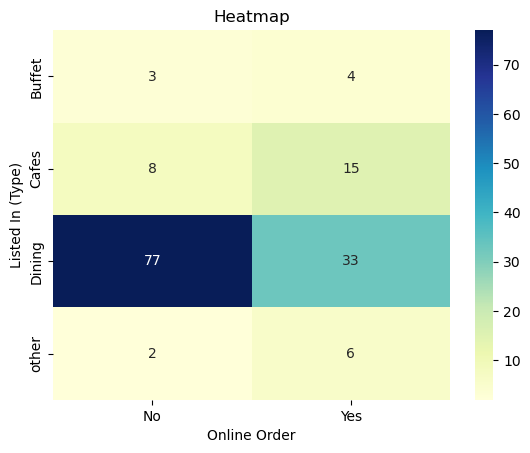

In [61]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


#conclusion 8:- Dining restaurents primarily accepts offline orders, where as cafes receives online orders 
This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.
